# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json


%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
 
my_btc = 1.2

my_eth = 5.3

monthly_income = 12000


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Checking Dictionary
response_data_btc = requests.get(btc_url).json()
response_data_btc 

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19278875,
   'total_supply': 19278875,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 23459.0,
     'volume_24h': 35309261610,
     'market_cap': 452350948203,
     'percentage_change_1h': 1.41696757543482,
     'percentage_change_24h': 1.30579552261943,
     'percentage_change_7d': 3.75575317471948,
     'percent_change_1h': 1.41696757543482,
     'percent_change_24h': 1.30579552261943,
     'percent_change_7d': 3.75575317471948}},
   'last_updated': 1675282469}},
 'metadata': {'timestamp': 1675282469,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [6]:
# Checking dictionary 
response_data_eth = requests.get(eth_url).json()
response_data_eth 

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120515300,
   'total_supply': 120515300,
   'max_supply': 120515300,
   'quotes': {'USD': {'price': 1625.34,
     'volume_24h': 8562962125,
     'market_cap': 195979307516,
     'percentage_change_1h': 2.63791160023007,
     'percentage_change_24h': 1.80833331809606,
     'percentage_change_7d': 4.38520926859862,
     'percent_change_1h': 2.63791160023007,
     'percent_change_24h': 1.80833331809606,
     'percent_change_7d': 4.38520926859862}},
   'last_updated': 1675282471}},
 'metadata': {'timestamp': 1675282471,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [7]:
# Testing to see if data pull worked
response_data_btc["data"]["1"]["quotes"]["USD"]["price"]

23459.0

In [8]:
# Testing to see if data pull worked
response_data_eth["data"]["1027"]["quotes"]["USD"]["price"]

1625.34

In [9]:
# Fetch current BTC price

response_data_btc = requests.get(btc_url).json()
btc_price = response_data_btc["data"]["1"]["quotes"]["USD"]["price"]


# Fetch current ETH price

response_data_eth = requests.get(eth_url).json()
eth_price = response_data_eth["data"]["1027"]["quotes"]["USD"]["price"]


# Multiplying btc/eth_price by my_btc/eth to get the current value of BTC/ETH
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $28150.80
The current value of your 5.3 ETH is $8614.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca API object

                           
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [12]:
# Format current date as ISO format

start_date = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-01-08", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])


# Preview DataFrame

df_ticker.head(10)

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2020-01-02 05:00:00+00:00  112.68  112.80  112.5600  112.68  6791537   
2020-01-03 05:00:00+00:00  112.89  113.05  112.7814  113.01  3664283   
2020-01-06 05:00:00+00:00  113.13  113.13  112.8400  112.92  8131608   
2020-01-07 05:00:00+00:00  112.92  112.92  112.7800  112.80  2883005   
2020-01-08 05:00:00+00:00  112.85  112.94  112.5450  112.67  7323117   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2020-01-02 05:00:00+00:00       17763  112.645004  323.54  324.89  322.53   
2020-01-03 05:00:00+00:00       14453  112.958798  321.16  323.64  321.10   
2020-01-06 05:00:00+00:00       17277  112.949600  320.49  323.73  320.36   
2020-01-07 05:00:00+00:00       11523  112.834953  323.02  323.54  322.24   
2020-01-08 05:00:00+00:00       12854  112.671650  322.94  325.78  322.67   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-01-02 05:00:00+00:00  324.87  59253833      304884  323.710023  
2020-01-03 05:00:00+00:00  322.43  77783121      358500  322.791701  
2020-01-06 05:00:00+00:00  323.73  55817168      255767  322.722391  
2020-01-07 05:00:00+00:00  322.74  42874811      226059  322.711069  
2020-01-08 05:00:00+00:00  324.42  68435753      340004  324.331733

In [13]:
df_closing_prices = pd.DataFrame()
# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head()

,AGG,SPY
2020-01-02,112.68,324.87
2020-01-03,113.01,322.43
2020-01-06,112.92,323.73
2020-01-07,112.80,322.74
2020-01-08,112.67,324.42


In [14]:
# Pick AGG and SPY close prices

# AGG
agg_close_price = float(df_ticker["AGG"]["close"][0])
# SPY
spy_close_price = float(df_ticker["SPY"]["close"][0])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.68
Current SPY closing price: $324.87


In [15]:
# Compute the current value of shares

my_spy_value = agg_close_price * my_agg
my_agg_value = spy_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22536.00
The current value of your 200 AGG shares is $64974.00


### Savings Health Analysis

In [16]:
# Set monthly household income

savings_data = {
    "amount":[106407.569394, 37516.500000]
}

# Consolidate financial assets data

assets = ["crypto", "shares"]

# Create savings DataFrame

df_savings = pd.DataFrame(savings_data, index=assets)
# Display savings DataFrame
display(df_savings)

,amount
crypto,106407.569394
shares,37516.500000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

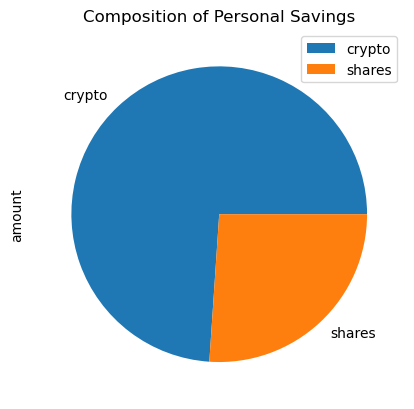

In [17]:
# Plot savings pie chart

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings

total_savings = float(df_savings.sum())
# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Your savings are equal to your emergency fund.")
elif total_savings < emergency_fund:
    print("You do not have enough money in your savings fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [52]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df



# Reorganize the DataFrame
# Separate ticker data

AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames

df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])          
           
# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [138]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns


MC_stock_data_30 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [139]:
# Printing the simulation input data

MC_stock_data_30.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [140]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

MC_stock_data_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Matt\Jupyter\HomeWork\Module_5\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011739,0.997574,0.998936,1.000813,1.009349,0.989776,1.001224,0.985732,0.993214,1.002824,...,1.001516,0.989644,0.997363,0.992055,1.003502,1.005883,1.002387,1.012525,1.004682,1.003067
2,0.996219,0.992806,1.001464,0.990610,1.012617,0.989376,1.006181,0.975238,0.996786,1.007781,...,1.000239,0.997020,1.008313,1.006323,1.007269,1.013289,1.005155,1.009101,0.999228,1.004034
3,0.998581,1.007561,1.004704,0.991280,1.006367,0.998028,1.006669,0.978506,0.998372,1.002615,...,1.001424,1.003462,1.006121,1.014698,1.009784,1.011702,0.995668,1.015147,0.992216,1.010363
4,1.003964,1.004632,0.994618,0.995214,0.998898,1.008414,1.005039,0.972955,1.003996,1.002092,...,1.005949,0.990086,1.005200,1.018260,1.005486,1.014944,1.001071,1.016824,0.995872,1.020497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.242669,20.455980,19.104622,10.860129,23.566113,7.630254,4.164320,24.579933,13.952904,47.505207,...,16.877748,10.619237,11.445586,8.452871,16.767936,5.712736,16.937159,32.428189,1.994264,11.186692
7557,17.187630,20.250409,18.895396,10.911794,23.435469,7.651811,4.144348,24.582505,13.955150,47.678141,...,16.937173,10.576466,11.405373,8.482998,16.870764,5.724274,17.134412,32.298317,1.992796,11.197069
7558,17.154078,20.297869,18.962356,10.971140,23.650945,7.715866,4.155200,24.825386,13.936878,47.861301,...,16.948684,10.582301,11.462341,8.489428,16.825965,5.682205,17.142807,32.489288,2.022425,11.245272
7559,17.317277,20.399170,19.082855,10.911438,23.666828,7.652576,4.152274,24.807142,13.775415,47.637443,...,17.051448,10.742582,11.656609,8.494522,16.531108,5.673854,17.161557,32.803280,2.010313,11.369085


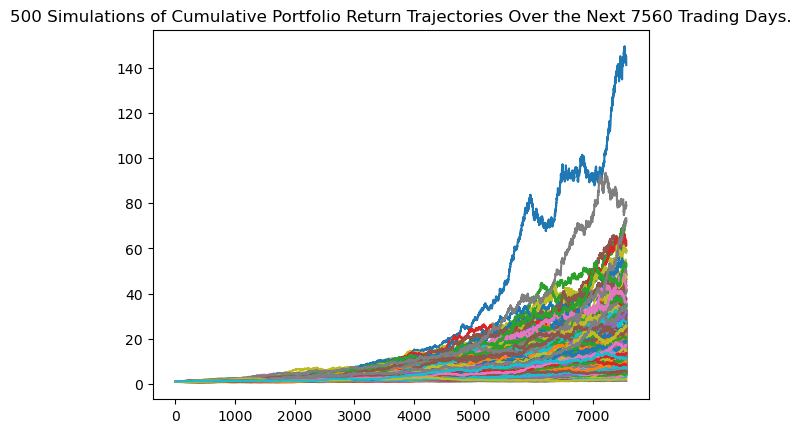

In [159]:
# Plot simulation outcomes

line_plot_30 = MC_stock_data_30.plot_simulation()

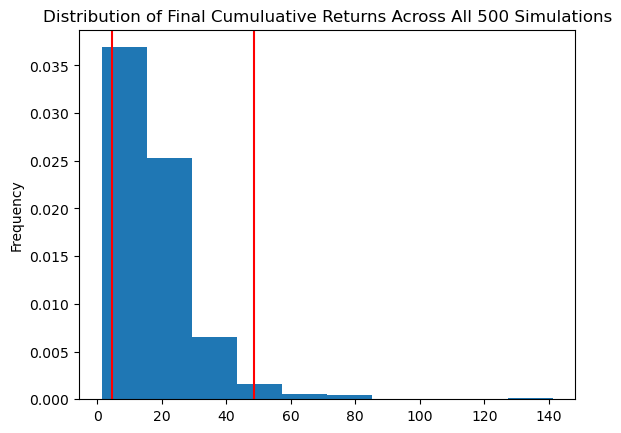

In [158]:
# Plot probability distribution and confidence intervals

dist_plot_30 = MC_stock_data_30.plot_distribution()


### Retirement Analysis

In [144]:
# Fetch summary statistics from the Monte Carlo simulation results

even_tbl = MC_stock_data_30.summarize_cumulative_return()

# Print summary statistics

even_tbl

count           500.000000
mean             18.066252
std              12.635127
min               1.331447
25%               9.748455
50%              14.935485
75%              23.536129
max             141.183134
95% CI Lower      4.639070
95% CI Upper     48.473869
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [145]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000


ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92781.41 and $969477.38


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [146]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000


ci_lower = round(even_tbl[8]*20000*1.5,2)
ci_upper = round(even_tbl[9]*20000*1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $139172.11 and $1454216.07


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [147]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns

MC_stock_data_5 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [148]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

MC_stock_data_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Matt\Jupyter\HomeWork\Module_5\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003573,0.996340,1.011651,0.991038,0.994993,1.006970,1.011649,1.009176,0.988448,1.005369,...,1.003104,0.996286,0.994271,0.986183,0.997232,0.999921,0.985890,1.003033,1.016481,1.003409
2,0.995879,1.008465,1.029268,1.000905,0.993915,1.007741,1.012591,1.002664,0.987506,1.006335,...,1.013975,0.986006,0.994513,0.994153,1.004871,1.015770,0.978516,0.995114,1.015764,1.010439
3,1.001737,1.018348,1.026785,1.001448,0.993416,0.989417,1.009275,1.015672,0.978992,0.980839,...,1.028588,0.980088,0.992545,0.985195,1.016000,1.009292,0.972434,0.988890,1.001057,1.011316
4,1.006694,1.011477,1.027909,1.017696,0.996022,0.988468,1.011194,1.021201,0.988021,0.991367,...,1.030481,0.997210,0.992307,0.998916,1.016334,1.011482,0.979374,0.995058,0.992498,1.003524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.495988,2.045996,1.107957,2.625072,2.554979,1.794175,3.000016,2.256026,2.073394,2.097583,...,2.730377,1.624036,1.121116,1.404358,2.565644,1.414030,0.854561,1.263702,0.986409,2.221129
1257,1.503982,2.055403,1.113969,2.699461,2.541541,1.804171,3.018716,2.250783,2.084612,2.083525,...,2.748167,1.622849,1.119849,1.389443,2.573905,1.421172,0.841811,1.273365,0.991902,2.248098
1258,1.518600,2.056248,1.113189,2.708517,2.527944,1.808876,3.016767,2.246297,2.076662,2.095978,...,2.808497,1.600390,1.129270,1.387716,2.602575,1.413887,0.848190,1.253354,1.003806,2.270381
1259,1.525230,2.060411,1.092316,2.729058,2.505351,1.789656,3.059743,2.260835,2.073150,2.068336,...,2.819968,1.625066,1.124808,1.381293,2.592491,1.424983,0.857232,1.260158,0.996947,2.289760


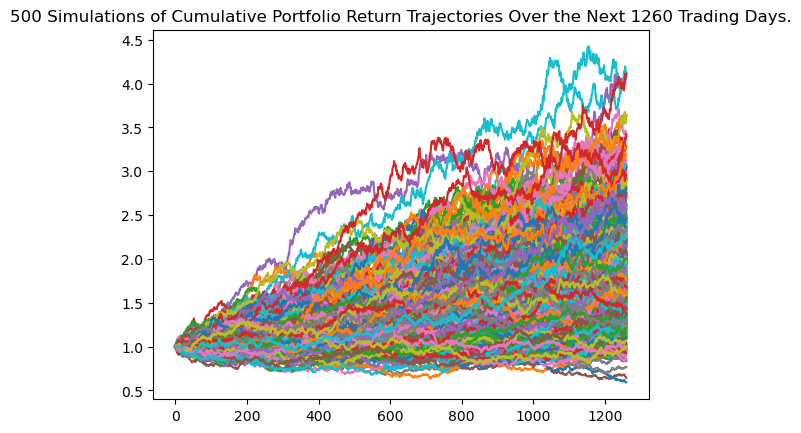

In [156]:
# Plot simulation outcomes

line_plot_5 = MC_stock_data_5.plot_simulation()

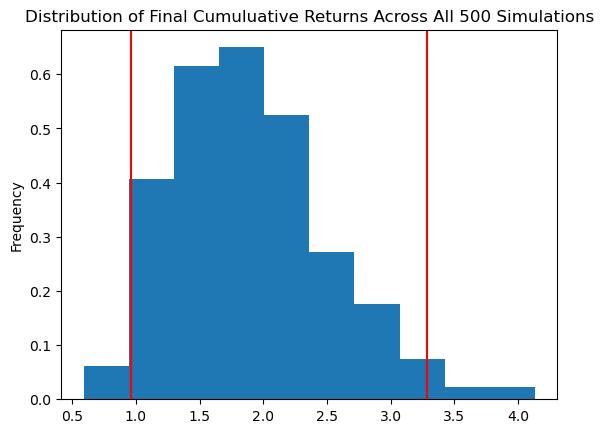

In [157]:
# Plot probability distribution and confidence intervals

dist_plot_5 = MC_stock_data_5.plot_distribution()

In [152]:
# Fetch summary statistics from the Monte Carlo simulation results

even_tbl2 = MC_stock_data_5.summarize_cumulative_return()

# Print summary statistics

even_tbl2


count           500.000000
mean              1.894794
std               0.612245
min               0.591877
25%               1.444095
50%               1.793119
75%               2.246958
max               4.130671
95% CI Lower      0.963465
95% CI Upper      3.281619
Name: 1260, dtype: float64

In [153]:
# Set initial investment

initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


ci_lower_five = round(even_tbl2[8]*60000,2)
ci_upper_five = round(even_tbl2[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57807.91 and $196897.12


### Ten Years Retirement Option

In [154]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

MC_stock_data_10 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [155]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns

MC_stock_data_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Matt\Jupyter\HomeWork\Module_5\Starter_Code\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012784,0.991225,0.997372,0.996427,1.009393,0.990806,1.011025,0.989756,0.989643,0.989037,...,0.999698,0.994565,1.007593,0.979479,1.000559,0.994170,1.001288,0.998943,0.997416,1.006636
2,1.010293,0.994730,0.994381,1.000683,0.994592,0.996425,1.006864,0.996807,0.986743,0.993727,...,1.011547,0.993435,1.001317,0.985667,1.005532,0.990940,1.003711,1.000430,0.989462,1.000197
3,1.001190,1.011232,0.985973,0.988702,0.984927,1.009133,1.018219,0.998551,1.004529,0.992362,...,1.009435,1.003046,1.010184,0.979417,1.007466,0.979891,1.011633,1.007153,0.985860,1.007703
4,0.996040,1.018847,0.997547,0.981024,0.990315,0.995515,1.026163,0.996616,1.015196,0.979688,...,1.020501,1.013781,1.001989,0.967007,1.010234,0.975823,1.005322,1.007685,0.994295,1.013340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.206491,2.113253,3.574344,4.241420,2.522525,4.217806,1.613478,9.791261,2.796674,2.891397,...,5.870228,2.669328,2.197870,3.571556,5.769533,2.091489,2.922614,3.995233,2.776896,5.314377
2517,4.201637,2.145619,3.581525,4.296123,2.489517,4.224996,1.609276,9.967702,2.828001,2.892977,...,5.864134,2.669442,2.245540,3.606693,5.783842,2.115486,2.941564,4.017155,2.826514,5.285617
2518,4.196199,2.156369,3.513114,4.327287,2.494587,4.239540,1.621352,10.014078,2.850907,2.903181,...,5.833107,2.635527,2.272155,3.578418,5.843219,2.124603,2.951155,4.000525,2.868208,5.348050
2519,4.172452,2.150989,3.487511,4.331328,2.495035,4.233119,1.612321,9.923615,2.831149,2.939590,...,5.859003,2.644047,2.236444,3.572122,5.887971,2.126580,2.952359,4.009943,2.874033,5.331574


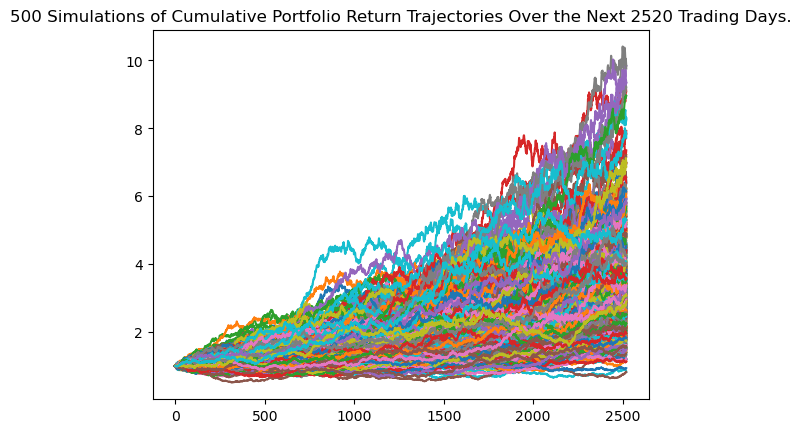

In [160]:
# Plot simulation outcomes

line_plot_10 = MC_stock_data_10.plot_simulation()

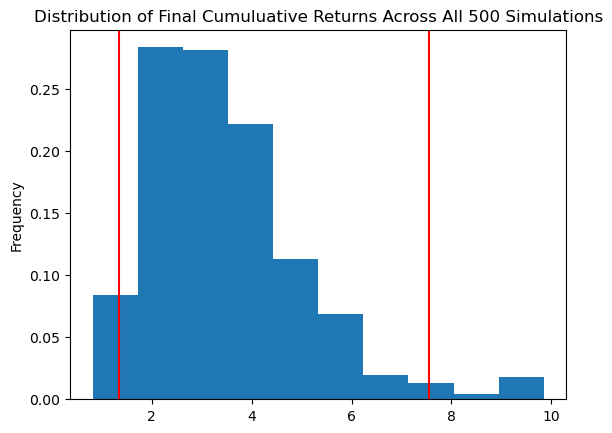

In [161]:
# Plot probability distribution and confidence intervals

dist_plot_10 = MC_stock_data_10.plot_distribution()

In [163]:
# Fetch summary statistics from the Monte Carlo simulation results

even_tbl_10 = MC_stock_data_10.summarize_cumulative_return()
# Print summary statistics

even_tbl_10

count           500.000000
mean              3.481033
std               1.574568
min               0.823135
25%               2.362808
50%               3.228025
75%               4.235456
max               9.845998
95% CI Lower      1.355280
95% CI Upper      7.548096
Name: 2520, dtype: float64

In [165]:
# Set initial investment

initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000


ci_lower_ten = round(even_tbl2[8]*60000,2)
ci_upper_ten = round(even_tbl2[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $57807.91 and $196897.12
